<a href="https://colab.research.google.com/github/enzoampil/phcovid/blob/master/sample/phcovid_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [0]:
!pip install phcovid

     |████████████████████████████████| 112kB 3.6MB/s 
     |████████████████████████████████| 13.1MB 4.5MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: matplotlib 3.2.1
    Uninstalling matplotlib-3.2.1:
      Successfully uninstalled matplotlib-3.2.1


In [0]:
from phcovid import get_cases
from matplotlib import pyplot as plt
import numpy as np

# Get data

In [0]:
%%time
df = get_cases()

CPU times: user 44.4 s, sys: 153 ms, total: 44.5 s
Wall time: 47.8 s


In [0]:
df.head()

,case_no,age,sex,nationality,residence,travel_history,symptoms,confirmation_date,facility,latitude,longitude,status,epi_link,date,contacts,num_contacts,case_no_num,contacts_num,announcement_date
0,PH501,60,Male,Australian,Makati City,,none,2020-03-23,St. Luke's Medical Center - Global City,14.555128,121.048256,Admitted,,NaT,[],0,501,[],2020-03-24
1,PH502,56,Female,Filipino,San Juan City,,none,2020-03-22,Cardinal Santos Medical Center,14.597596,121.045994,Admitted,,NaT,[],0,502,[],2020-03-29
2,PH503,74,Male,Filipino,San Juan City,,none,2020-03-22,Cardinal Santos Medical Center,14.597596,121.045994,Admitted,,NaT,[],0,503,[],2020-03-28
3,PH504,61,Male,Filipino,San Juan City,,none,2020-03-22,for_validation,14.615867,120.980991,Admitted,,NaT,[],0,504,[],2020-03-25
4,PH505,32,Male,Filipino,Manila City,,none,2020-03-22,Cardinal Santos Medical Center,14.597596,121.045994,Admitted,,NaT,[],0,505,[],2020-03-24


In [0]:
df.status.unique()

array(['Admitted', 'Expired', 'Recovered'], dtype=object)

In [0]:
df.shape

(1546, 19)

In [0]:
df.columns

Index(['case_no', 'age', 'sex', 'nationality', 'residence', 'travel_history',
       'symptoms', 'confirmation_date', 'facility', 'latitude', 'longitude',
       'status', 'epi_link', 'date', 'contacts', 'num_contacts', 'case_no_num',
       'contacts_num', 'announcement_date'],
      dtype='object')

# Save data as a csv

In [0]:
from google.colab import files

In [0]:
df = get_cases()
df.to_csv('phcovid_cases.csv', index=False)

In [0]:
files.download('phcovid_cases.csv')

# Plot cases over time

In [0]:
cases = df.groupby('announcement_date').agg({'case_no': 'count'})
cases.columns = ['new_cases']
cases['total_cases'] = cases.cumsum()
cases['log_total_cases'] = np.log10(cases.total_cases.values)
cases['log_new_cases'] = np.log10(cases.new_cases.values)

Text(0.5, 1.0, 'New cases vs total COVID-19 cases in PH')

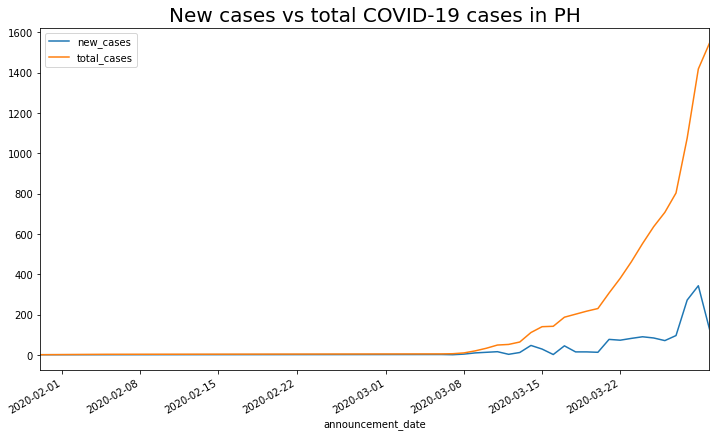

In [0]:
cases[['new_cases', 'total_cases']].plot(figsize=(12, 7))
plt.title("New cases vs total COVID-19 cases in PH", fontsize=20)

Text(0.5, 1.0, 'Log New Cases vs Log Total Cases PH')

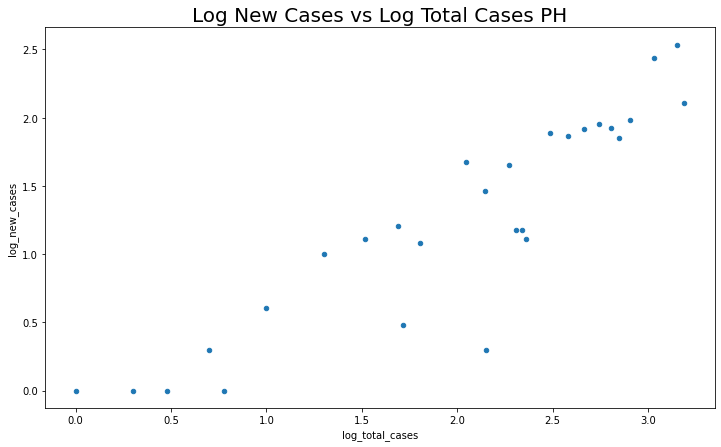

In [0]:
ax = cases[['log_new_cases', 'log_total_cases']].plot.scatter(1, 0, figsize=(12, 7))
plt.title("Log New Cases vs Log Total Cases PH", fontsize=20)